<a href="https://colab.research.google.com/github/zhanersun/BA810Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Customer Churn Prediction**
Team 1: Xin (Ashley) Su, Zhaner Sun, Lingxuan (Alice) Wang, Weiming (Kevin) Wang

## **Part 1: Introduction**
In this project, we aim to predict credit card customers churn on a challenging dataset obtained from [Kaggle](https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction). By exploring what factors will influence customers' decisions, we believe our project will help business maximize the chances that the customer will remain and enable business to know what marketing action to take for each individual customer.

## **Part 2: Data Cleaning**
In the original dataset, there are 20 columns and 10,126 rows with three data types which are object, float, and integer. The variables’ description is available through this link: [variable dictionary](https://docs.google.com/document/d/13HBQZLazia_mHAFVlF7OltEG0AEI-RSqBgEpAfYrmJ8/edit?usp=sharing). After we had a brief overview, we found that our target variable `Attrition_Flag` is a string. Therefore, we first converted `Attrition_Flag` to integer. In addition, we discovered that there are three columns with unknown records. In order to make the later prediction more precise, we decided to drop those unknown records. After the data is cleaned, we have 7,081 records in total.


In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import dataset
from google.colab import drive
drive.mount('/content/gdrive')
churn = pd.read_csv('gdrive/Shareddrives/BA810/BankChurners.csv', usecols = range(1,21))

# retrn the basic information of the dataset; no null values
churn.info()

# retrn the first few records
churn.head()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 no

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# convert the value of `Attrition_Flag` from strings to integers
attrition = {'Existing Customer': 0, 'Attrited Customer': 1}
churn.Attrition_Flag = [attrition[item] for item in churn.Attrition_Flag]

# drop unknown records
unknown_rows = churn[(churn['Education_Level'] == 'Unknown') | 
                     (churn['Marital_Status'] == 'Unknown') | 
                     (churn['Income_Category'] == 'Unknown')].index
churn = churn.drop(unknown_rows)

# check the updated dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   int64  
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   object 
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   object 
 5   Marital_Status            7081 non-null   object 
 6   Income_Category           7081 non-null   object 
 7   Card_Category             7081 non-null   object 
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Ope

## **Part 3: Descriptive Analysis**


### **1. Summary Statistics**
After we cleaned our dataset, we ran the following code to compute the summary statistics, we discovered that only about 16% of customers are attrited.

In [ ]:
churn.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,0.157181,46.347691,2.337805,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313
std,0.363997,8.041225,1.291649,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


### **2. Correlation Matrix**
The correlation matrix indicates several strong associations. For example, as a customer's age increases, the period of customer’s relationship with the bank increases. Besides, the increase of credit Limit on the credit card will increase the open to buy credit line.

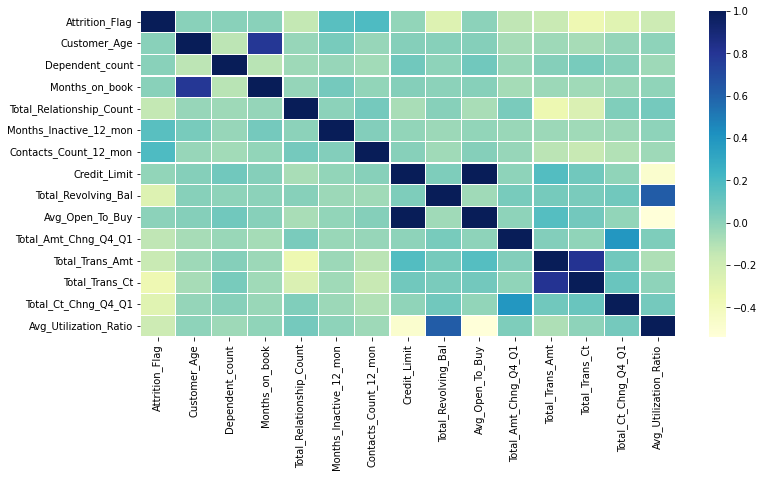

In [ ]:
plt.figure(figsize=(12, 6))
corr = churn.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.2, cmap="YlGnBu")

### **3. Catplot of Marital Status**
Based on the graph below, there is a clear difference between single and married customers for both attried and existing customers. There are more existing customers who are single or married, while the number of single attrited customers is similar to the number of married attrited customers.

<Figure size 864x432 with 0 Axes>

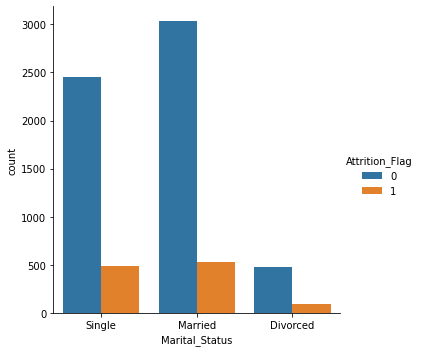

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(x = 'Marital_Status', hue = 'Attrition_Flag', data = churn, 
            kind="count", order = ['Single', 'Married', 'Divorced'], 
            aspect = 1)

### **4. Catplot of Card Category**
It’s clear that blue card holders are significantly more than all other cards’ holders for both existing and attrited customers.

<Figure size 864x432 with 0 Axes>

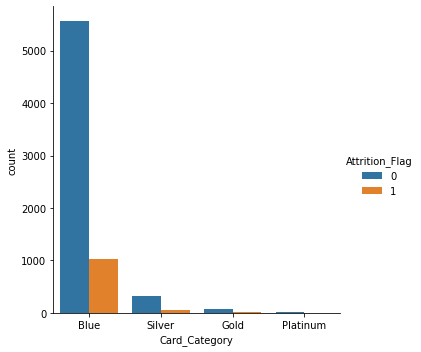

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(x = 'Card_Category', hue = 'Attrition_Flag', data = churn, 
            kind="count", order = ['Blue', 'Silver', 'Gold', 'Platinum'], 
            aspect = 1)

### **5. Histogram of Numerical Variables**
Histogram of Numerical Variables: Based on the output, there are several key findings:
*   `Dependent_count`: Most customers have the number of dependents around 2 and 3.
*   `Months_on_book`: It’s nearly a normal distribution with most records centered in the middle with 30-40 months of relationship with the bank.
*   `Credit_Limit` and `Avg_Open_To_Buy`: These two histograms are almost identical. Earlier, the correlation matrix also suggests a strong association between these two variables which may imply that these two variables measure the same thing–credit limit on the credit card. Both of the histograms are right skewed which tell that most customers have a credit limit below 10,000.







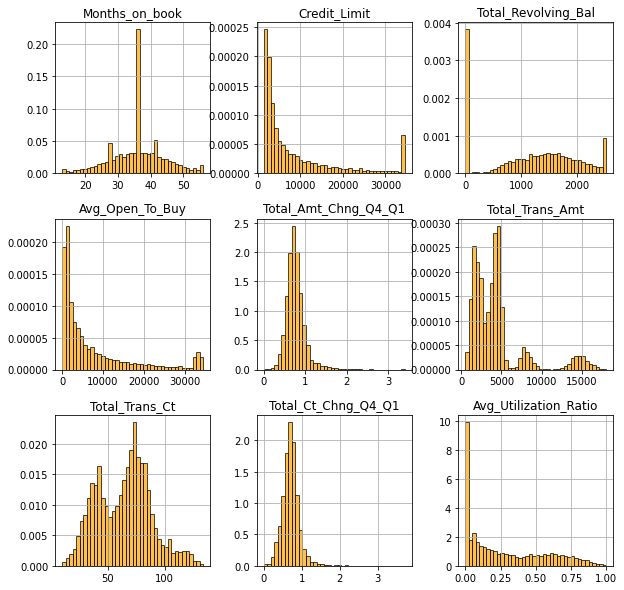

In [ ]:
his = churn.drop(['Attrition_Flag', 'Gender', 'Education_Level',
                        'Marital_Status', 'Income_Category', 'Card_Category', 
                        'Customer_Age', 'Dependent_count', 'Total_Relationship_Count',
                        'Months_Inactive_12_mon', 'Contacts_Count_12_mon'], 
                           axis=1)

# compute histogram
ax = his.hist(bins=40, density=True, facecolor="orange", 
                        edgecolor="black", alpha=0.7, figsize=(10, 10))

### **6. Distribution of Customer Age**
According to the graph, for both existing customers and attrited customers, most customers are distributed between the ages of 40 and 60.


[Text(0.5, 0, 'Customer Age')]

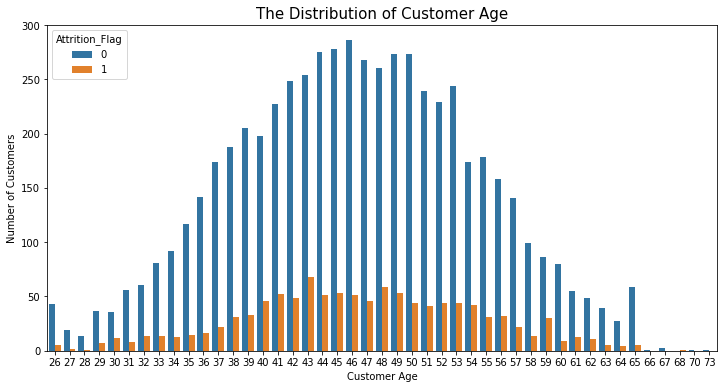

In [ ]:
plt.figure(figsize=(12, 6))
axis_name="Number of Customers"
gp_age = churn.groupby("Customer_Age")["Attrition_Flag"].value_counts()
gp_age = gp_age.to_frame().rename({"Attrition_Flag": axis_name}, axis=1).reset_index()
ax = sns.barplot(x='Customer_Age', y= axis_name, hue='Attrition_Flag', data=gp_age)
ax.set_title("The Distribution of Customer Age", fontsize = 15)
ax.set(xlabel='Customer Age')

### **7. Boxplot of Number of Dependents by Gender**
The box plot indicates that attrited male customers have less number of dependents than existing male customers. However, for female customers, there is not a significant difference between attrited and existing. 


<Figure size 864x432 with 0 Axes>

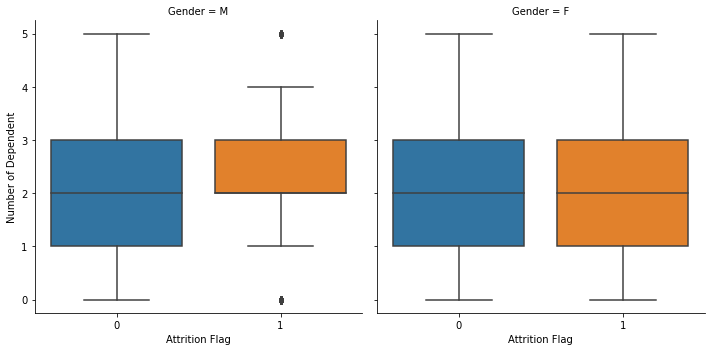

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.catplot(x='Attrition_Flag', y='Dependent_count', data=churn, col='Gender', kind='box')
ax.set(xlabel='Attrition Flag', ylabel='Number of Dependent')

### **8. Boxplot of Number of Products Held by Customer**
The output shows that existing customers have a higher average number of products than attrited customers.


[Text(0, 0.5, 'Number of Products Held by Customer'),
 Text(0.5, 0, 'Attrition Flag')]

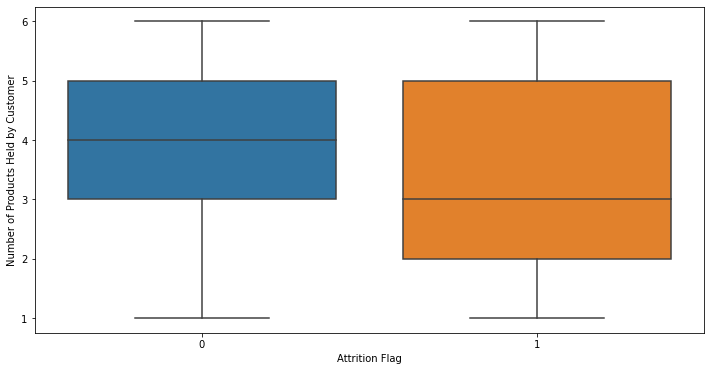

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=churn)
ax.set(xlabel='Attrition Flag', ylabel='Number of Products Held by Customer')

### **9. Boxplot of Credit Limit by Gender**
Based on the output, there is a significant difference between male and female customers. Either existing or attrited male customers have a higher credit limit than female customers.


<Figure size 864x432 with 0 Axes>

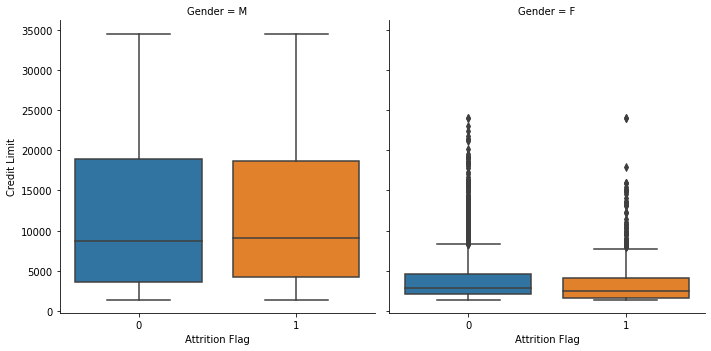

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.catplot(x='Attrition_Flag', y='Credit_Limit', data=churn, col='Gender', kind='box')
ax.set(xlabel='Attrition Flag', ylabel='Credit Limit')

### **10. Barplot of Credit Limit and Income Category**
According to the graph, there is a clear trend in the income category. For both existing and attrited customers, as their income increases, their credit limit increases as well.

[Text(0, 0.5, 'Credit Limit'), Text(0.5, 0, 'Income Category')]

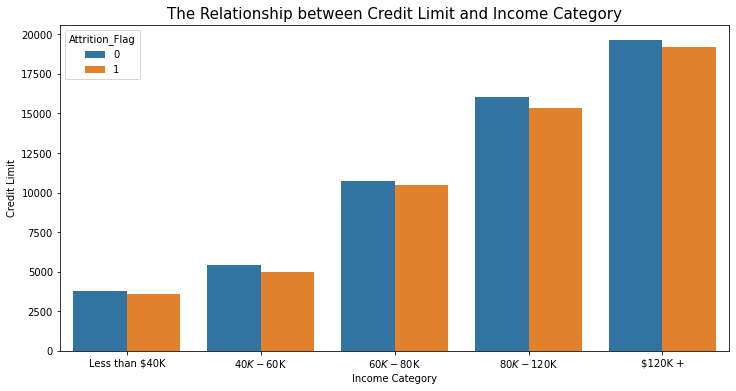

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Income_Category' , y='Credit_Limit', data=churn, 
                 hue ='Attrition_Flag', order =['Less than $40K', '$40K - $60K',
                                                '$60K - $80K', '$80K - $120K', '$120K +'], 
                 ci=None)
ax.set_title("The Relationship between Credit Limit and Income Category", fontsize = 15)
ax.set(xlabel='Income Category', ylabel='Credit Limit')

## **Part 4: Machine Learning**

### **1. Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = churn.drop('Attrition_Flag', axis=1) 
y = churn['Attrition_Flag'].copy()      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5664, 19), (1417, 19), (5664,), (1417,))

### **2. Build Preprocessing Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display='diagram')

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  # patching

preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='object'))
])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f618430>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f1cc5e0>)])

In [ ]:
# check the column names produced by the pipeline
X_tr = preprocess_pipeline.fit_transform(X_train)
y_tr = y_train.values
preprocess_pipeline.get_feature_names_out()

array(['num__Customer_Age', 'num__Dependent_count', 'num__Months_on_book',
       'num__Total_Relationship_Count', 'num__Months_Inactive_12_mon',
       'num__Contacts_Count_12_mon', 'num__Credit_Limit',
       'num__Total_Revolving_Bal', 'num__Avg_Open_To_Buy',
       'num__Total_Amt_Chng_Q4_Q1', 'num__Total_Trans_Amt',
       'num__Total_Trans_Ct', 'num__Total_Ct_Chng_Q4_Q1',
       'num__Avg_Utilization_Ratio', 'cat__Gender_F', 'cat__Gender_M',
       'cat__Education_Level_College', 'cat__Education_Level_Doctorate',
       'cat__Education_Level_Graduate',
       'cat__Education_Level_High School',
       'cat__Education_Level_Post-Graduate',
       'cat__Education_Level_Uneducated', 'cat__Marital_Status_Divorced',
       'cat__Marital_Status_Married', 'cat__Marital_Status_Single',
       'cat__Income_Category_$120K +', 'cat__Income_Category_$40K - $60K',
       'cat__Income_Category_$60K - $80K',
       'cat__Income_Category_$80K - $120K',
       'cat__Income_Category_Less than $40K

### **3. Model Evaluation without Feature Selection**


#### 3.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

lr_pipeline = make_pipeline(preprocess_pipeline, LogisticRegression())
lr_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=10, scoring='balanced_accuracy')
print('The balanced accuracy score is:', lr_scores.mean().round(4))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The balanced accuracy score is: 0.7764


#### 3.2 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = make_pipeline(preprocess_pipeline, KNeighborsClassifier())
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=10, scoring='balanced_accuracy')
print('The balanced accuracy score is:', knn_scores.mean().round(4))

The balanced accuracy score is: 0.7571


#### 3.3 SVM

In [ ]:
from sklearn.svm import SVC

svc_pipeline = make_pipeline(preprocess_pipeline, SVC(gamma="auto"))
svc_scores = cross_val_score(svc_pipeline, X_train, y_train, cv=10, scoring='balanced_accuracy')
print('The balanced accuracy score is:', svc_scores.mean().round(4))

The balanced accuracy score is: 0.8142


#### 3.4 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = make_pipeline(preprocess_pipeline, DecisionTreeClassifier(random_state=42))
dt_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=10, scoring='balanced_accuracy')
print('The balanced accuracy score is:', dt_scores.mean().round(4))

The balanced accuracy score is: 0.8787


#### 3.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = make_pipeline(preprocess_pipeline, RandomForestClassifier(n_estimators=100, random_state=42))
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=10, scoring='balanced_accuracy')
print('The balanced accuracy score is:', rf_scores.mean().round(4))

The balanced accuracy score is: 0.8609


#### 3.6 Compare Scores
Now we know that, before feature selection, Decision Tree and Random Forest have better balanced accuracy scores than other models. Next we will do feature selection for all five models and see what will be the post feature selection balanced accuracy scores.

In [ ]:
scores = {"SVM": svc_scores, "Logistic Regression": lr_scores, "kNN": knn_scores, "Random Forest": rf_scores, "Decision Tree": dt_scores}
scores_df = pd.DataFrame(data=scores)

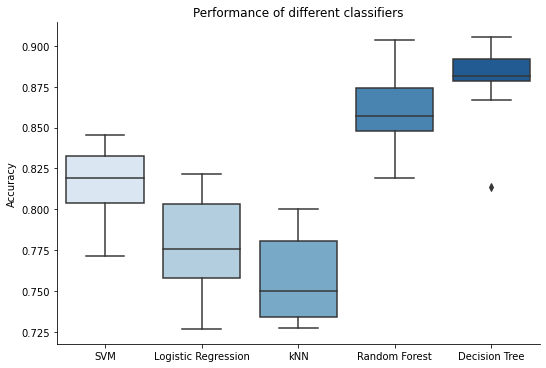

In [ ]:
sns.catplot(data=scores_df, kind='box', aspect=1.5, palette='Blues').set(title='Performance of different classifiers', ylabel='Accuracy')

### **4. Model Evaluation with Feature Selection**

#### 4.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

selection_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('select', SequentialFeatureSelector(LinearRegression(), n_features_to_select=1.0)),
])

selection_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f618430>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f1cc5e0>)])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=1.0))])

In [ ]:
lr_selection_pipeline = make_pipeline(selection_pipeline, LogisticRegression())

In [ ]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = ({
    'pipeline__select__n_features_to_select': np.arange(1, 35)
})

grid_search_lr = GridSearchCV(lr_selection_pipeline, param_grid_lr, cv=3, scoring='balanced_accuracy')
grid_search_lr.fit(X_train, y_train)
grid_search_lr.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f00290cc730>),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f00291f7280>)])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=33))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
print(grid_search_lr.best_params_) # Number of columns that were kept
print(grid_search_lr.best_score_) # Balanced accuracy score obtained at that
names_in = grid_search_lr.best_estimator_['pipeline']['preprocessing'].get_feature_names_out()
print('The input columns were ', names_in)  # names of 34 columns that were supplied
selected_index = grid_search_lr.best_estimator_['pipeline']['select'].support_  # boolean vector indicating what is kept
print('The selected columns are ', names_in[selected_index])  # The columns that were kept

{'pipeline__select__n_features_to_select': 33}
0.7796940345018335
The input columns were  ['num__Customer_Age' 'num__Dependent_count' 'num__Months_on_book'
 'num__Total_Relationship_Count' 'num__Months_Inactive_12_mon'
 'num__Contacts_Count_12_mon' 'num__Credit_Limit'
 'num__Total_Revolving_Bal' 'num__Avg_Open_To_Buy'
 'num__Total_Amt_Chng_Q4_Q1' 'num__Total_Trans_Amt' 'num__Total_Trans_Ct'
 'num__Total_Ct_Chng_Q4_Q1' 'num__Avg_Utilization_Ratio' 'cat__Gender_F'
 'cat__Gender_M' 'cat__Education_Level_College'
 'cat__Education_Level_Doctorate' 'cat__Education_Level_Graduate'
 'cat__Education_Level_High School' 'cat__Education_Level_Post-Graduate'
 'cat__Education_Level_Uneducated' 'cat__Marital_Status_Divorced'
 'cat__Marital_Status_Married' 'cat__Marital_Status_Single'
 'cat__Income_Category_$120K +' 'cat__Income_Category_$40K - $60K'
 'cat__Income_Category_$60K - $80K' 'cat__Income_Category_$80K - $120K'
 'cat__Income_Category_Less than $40K' 'cat__Card_Category_Blue'
 'cat__Card_Cate

In [ ]:
cv_res_lr = pd.DataFrame(grid_search_lr.cv_results_)
cv_res_lr.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_lr.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pipeline__select__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
32,16.897135,2.051610,0.015582,0.000669,33,{'pipeline__select__n_features_to_select': 33},0.777048,0.761437,0.800598,0.779694,0.016096,1
31,17.888965,2.337552,0.030474,0.019789,32,{'pipeline__select__n_features_to_select': 32},0.775077,0.761437,0.801932,0.779482,0.016823,2
20,10.840531,0.225634,0.017103,0.003540,21,{'pipeline__select__n_features_to_select': 21},0.771765,0.761752,0.804213,0.779244,0.018123,3
25,12.654400,0.322998,0.014529,0.000552,26,{'pipeline__select__n_features_to_select': 26},0.775392,0.758441,0.803582,0.779138,0.018618,4
18,9.614566,0.249928,0.027725,0.002331,19,{'pipeline__select__n_features_to_select': 19},0.771765,0.759781,0.805548,0.779032,0.019378,5


#### 4.2 KNN

In [ ]:
knn_selection_pipeline = make_pipeline(selection_pipeline, KNeighborsClassifier())

In [ ]:
param_grid_knn = ({
    'pipeline__select__n_features_to_select': np.arange(1, 35)
})

grid_search_knn = GridSearchCV(knn_selection_pipeline, param_grid_knn, cv=3, scoring='balanced_accuracy')
grid_search_knn.fit(X_train, y_train)
grid_search_knn.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 102.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packages/

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f9f73a0>),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f914eb0>)])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=5))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_) 
names_in = grid_search_knn.best_estimator_['pipeline']['preprocessing'].get_feature_names_out()
print('The input columns were ', names_in) 
selected_index = grid_search_knn.best_estimator_['pipeline']['select'].support_ 
print('The selected columns are ', names_in[selected_index])

{'pipeline__select__n_features_to_select': 5}
0.8414269439247667
The input columns were  ['num__Customer_Age' 'num__Dependent_count' 'num__Months_on_book'
 'num__Total_Relationship_Count' 'num__Months_Inactive_12_mon'
 'num__Contacts_Count_12_mon' 'num__Credit_Limit'
 'num__Total_Revolving_Bal' 'num__Avg_Open_To_Buy'
 'num__Total_Amt_Chng_Q4_Q1' 'num__Total_Trans_Amt' 'num__Total_Trans_Ct'
 'num__Total_Ct_Chng_Q4_Q1' 'num__Avg_Utilization_Ratio' 'cat__Gender_F'
 'cat__Gender_M' 'cat__Education_Level_College'
 'cat__Education_Level_Doctorate' 'cat__Education_Level_Graduate'
 'cat__Education_Level_High School' 'cat__Education_Level_Post-Graduate'
 'cat__Education_Level_Uneducated' 'cat__Marital_Status_Divorced'
 'cat__Marital_Status_Married' 'cat__Marital_Status_Single'
 'cat__Income_Category_$120K +' 'cat__Income_Category_$40K - $60K'
 'cat__Income_Category_$60K - $80K' 'cat__Income_Category_$80K - $120K'
 'cat__Income_Category_Less than $40K' 'cat__Card_Category_Blue'
 'cat__Card_Categ

In [ ]:
cv_res_knn = pd.DataFrame(grid_search_knn.cv_results_)
cv_res_knn.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_knn.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pipeline__select__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,14.221941,1.851691,0.132012,0.003447,7,{'pipeline__select__n_features_to_select': 7},0.805901,0.820486,0.785819,0.804069,0.014212,1
4,8.402078,0.050604,0.110999,0.003987,5,{'pipeline__select__n_features_to_select': 5},0.766719,0.841932,0.798851,0.802501,0.030814,2
5,11.488347,1.280379,0.129156,0.012177,6,{'pipeline__select__n_features_to_select': 6},0.759072,0.845400,0.800040,0.801504,0.035259,3
7,15.657990,0.285335,0.142774,0.011112,8,{'pipeline__select__n_features_to_select': 8},0.804325,0.812523,0.783853,0.800234,0.012057,4
9,20.318825,0.708707,0.160497,0.012768,10,{'pipeline__select__n_features_to_select': 10},0.805350,0.816781,0.777957,0.800029,0.016290,5


#### 4.3 SVM

In [ ]:
svc_selection_pipeline = make_pipeline(selection_pipeline, SVC(gamma='auto', random_state=42))

In [ ]:
param_grid_svc = ({
    'pipeline__select__n_features_to_select': np.arange(1, 35)
})

grid_search_svc = GridSearchCV(svc_selection_pipeline, param_grid_svc, cv=3, scoring='balanced_accuracy')
grid_search_svc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 102.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packages/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('preprocessing',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           StandardScaler())]),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f618430>),
                                                                                         ('cat',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(s...
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f838f1cc5e0>)])),
                                                        ('select',
                                                         SequentialFeatureSelector(estimator=LinearRegression(),
                                                                                   n_features_to_select=1.0))])),
                                       ('svc',
                                        SVC(gamma='auto', random_state=42))]),
             param_grid={'pipeline__select__n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             scoring='balanced_accuracy')

In [ ]:
print(grid_search_svc.best_params_) 
print(grid_search_svc.best_score_) 
names_in = grid_search_svc.best_estimator_['pipeline']['preprocessing'].get_feature_names_out()
print('The input columns were ', names_in) 
selected_index = grid_search_svc.best_estimator_['pipeline']['select'].support_  
print('The selected columns are ', names_in[selected_index])  

{'pipeline__select__n_features_to_select': 8}
0.8440238443849731
The input columns were  ['num__Customer_Age' 'num__Dependent_count' 'num__Months_on_book'
 'num__Total_Relationship_Count' 'num__Months_Inactive_12_mon'
 'num__Contacts_Count_12_mon' 'num__Credit_Limit'
 'num__Total_Revolving_Bal' 'num__Avg_Open_To_Buy'
 'num__Total_Amt_Chng_Q4_Q1' 'num__Total_Trans_Amt' 'num__Total_Trans_Ct'
 'num__Total_Ct_Chng_Q4_Q1' 'num__Avg_Utilization_Ratio' 'cat__Gender_F'
 'cat__Gender_M' 'cat__Education_Level_College'
 'cat__Education_Level_Doctorate' 'cat__Education_Level_Graduate'
 'cat__Education_Level_High School' 'cat__Education_Level_Post-Graduate'
 'cat__Education_Level_Uneducated' 'cat__Marital_Status_Divorced'
 'cat__Marital_Status_Married' 'cat__Marital_Status_Single'
 'cat__Income_Category_$120K +' 'cat__Income_Category_$40K - $60K'
 'cat__Income_Category_$60K - $80K' 'cat__Income_Category_$80K - $120K'
 'cat__Income_Category_Less than $40K' 'cat__Card_Category_Blue'
 'cat__Card_Categ

In [ ]:
cv_res_svc = pd.DataFrame(grid_search_svc.cv_results_)
cv_res_svc.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_svc.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pipeline__select__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,3.464477,0.029568,0.107757,0.002030,8,{'pipeline__select__n_features_to_select': 8},0.846897,0.831602,0.853573,0.844024,0.009197,1
8,4.072203,0.027589,0.118345,0.008393,9,{'pipeline__select__n_features_to_select': 9},0.832312,0.828291,0.853184,0.837929,0.010911,2
6,3.089536,0.016823,0.105022,0.001172,7,{'pipeline__select__n_features_to_select': 7},0.835623,0.832863,0.840687,0.836391,0.003240,3
13,7.370178,0.068458,0.211359,0.109628,14,{'pipeline__select__n_features_to_select': 14},0.816386,0.834913,0.844933,0.832077,0.011826,4
4,1.927692,0.044037,0.096702,0.001475,5,{'pipeline__select__n_features_to_select': 5},0.825927,0.826163,0.843429,0.831840,0.008195,5


#### 4.4 Decision Tree

In [ ]:
dt_selection_pipeline = make_pipeline(selection_pipeline, DecisionTreeClassifier(random_state=42))

In [ ]:
param_grid_dt = ({
    'pipeline__select__n_features_to_select': np.arange(1, 35)
})

grid_search_dt = GridSearchCV(dt_selection_pipeline, param_grid_dt, cv=3, scoring='balanced_accuracy')
grid_search_dt.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 102.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packages/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('preprocessing',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           StandardScaler())]),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f0028f83730>),
                                                                                         ('cat',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(s...
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f002b6e13d0>)])),
                                                        ('select',
                                                         SequentialFeatureSelector(estimator=LinearRegression(),
                                                                                   n_features_to_select=1.0))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'pipeline__select__n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             scoring='balanced_accuracy')

In [ ]:
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)
names_in = grid_search_dt.best_estimator_['pipeline']['preprocessing'].get_feature_names_out()
print('The input columns were ', names_in)
selected_index = grid_search_dt.best_estimator_['pipeline']['select'].support_ 
print('The selected columns are ', names_in[selected_index])

{'pipeline__select__n_features_to_select': 20}
0.882033983734288
The input columns were  ['num__Customer_Age' 'num__Dependent_count' 'num__Months_on_book'
 'num__Total_Relationship_Count' 'num__Months_Inactive_12_mon'
 'num__Contacts_Count_12_mon' 'num__Credit_Limit'
 'num__Total_Revolving_Bal' 'num__Avg_Open_To_Buy'
 'num__Total_Amt_Chng_Q4_Q1' 'num__Total_Trans_Amt' 'num__Total_Trans_Ct'
 'num__Total_Ct_Chng_Q4_Q1' 'num__Avg_Utilization_Ratio' 'cat__Gender_F'
 'cat__Gender_M' 'cat__Education_Level_College'
 'cat__Education_Level_Doctorate' 'cat__Education_Level_Graduate'
 'cat__Education_Level_High School' 'cat__Education_Level_Post-Graduate'
 'cat__Education_Level_Uneducated' 'cat__Marital_Status_Divorced'
 'cat__Marital_Status_Married' 'cat__Marital_Status_Single'
 'cat__Income_Category_$120K +' 'cat__Income_Category_$40K - $60K'
 'cat__Income_Category_$60K - $80K' 'cat__Income_Category_$80K - $120K'
 'cat__Income_Category_Less than $40K' 'cat__Card_Category_Blue'
 'cat__Card_Categ

In [ ]:
cv_res_dt = pd.DataFrame(grid_search_dt.cv_results_)
cv_res_dt.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_dt.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pipeline__select__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
19,10.738700,0.381328,0.028256,0.007054,20,{'pipeline__select__n_features_to_select': 20},0.884743,0.880801,0.880558,0.882034,0.001918,1
31,15.022672,0.432538,0.029271,0.004974,32,{'pipeline__select__n_features_to_select': 32},0.896489,0.868030,0.877719,0.880746,0.011814,2
32,15.494661,1.549006,0.022417,0.009935,33,{'pipeline__select__n_features_to_select': 33},0.894992,0.868424,0.877331,0.880249,0.011041,3
20,11.546145,0.174557,0.025068,0.006566,21,{'pipeline__select__n_features_to_select': 21},0.878830,0.873943,0.885824,0.879532,0.004876,4
15,7.709292,0.017049,0.030042,0.001741,16,{'pipeline__select__n_features_to_select': 16},0.885924,0.868581,0.881747,0.878751,0.007391,5


#### 4.5 Random Forest

In [ ]:
rf_selection_pipeline = make_pipeline(selection_pipeline, RandomForestClassifier(n_estimators=100, random_state=42))

In [ ]:
param_grid_rf = ({
    'pipeline__select__n_features_to_select': np.arange(1, 35)
})

grid_search_rf = GridSearchCV(rf_selection_pipeline, param_grid_rf, cv=3, scoring='balanced_accuracy')
grid_search_rf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 102.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packages/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('preprocessing',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           StandardScaler())]),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f0028f83730>),
                                                                                         ('cat',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(s...
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f002b6e13d0>)])),
                                                        ('select',
                                                         SequentialFeatureSelector(estimator=LinearRegression(),
                                                                                   n_features_to_select=1.0))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'pipeline__select__n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             scoring='balanced_accuracy')

In [ ]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
names_in = grid_search_rf.best_estimator_['pipeline']['preprocessing'].get_feature_names_out()
print('The input columns were ', names_in)
selected_index = grid_search_rf.best_estimator_['pipeline']['select'].support_  
print('The selected columns are ', names_in[selected_index])

{'pipeline__select__n_features_to_select': 9}
0.8887235176329519
The input columns were  ['num__Customer_Age' 'num__Dependent_count' 'num__Months_on_book'
 'num__Total_Relationship_Count' 'num__Months_Inactive_12_mon'
 'num__Contacts_Count_12_mon' 'num__Credit_Limit'
 'num__Total_Revolving_Bal' 'num__Avg_Open_To_Buy'
 'num__Total_Amt_Chng_Q4_Q1' 'num__Total_Trans_Amt' 'num__Total_Trans_Ct'
 'num__Total_Ct_Chng_Q4_Q1' 'num__Avg_Utilization_Ratio' 'cat__Gender_F'
 'cat__Gender_M' 'cat__Education_Level_College'
 'cat__Education_Level_Doctorate' 'cat__Education_Level_Graduate'
 'cat__Education_Level_High School' 'cat__Education_Level_Post-Graduate'
 'cat__Education_Level_Uneducated' 'cat__Marital_Status_Divorced'
 'cat__Marital_Status_Married' 'cat__Marital_Status_Single'
 'cat__Income_Category_$120K +' 'cat__Income_Category_$40K - $60K'
 'cat__Income_Category_$60K - $80K' 'cat__Income_Category_$80K - $120K'
 'cat__Income_Category_Less than $40K' 'cat__Card_Category_Blue'
 'cat__Card_Categ

In [ ]:
cv_res_rf = pd.DataFrame(grid_search_rf.cv_results_)
cv_res_rf.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_rf.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pipeline__select__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
26,83.417321,2.504246,0.046743,0.000618,27,{'pipeline__select__n_features_to_select': 27},0.861718,0.866527,0.887522,0.871922,0.011204,1
28,97.802158,11.372800,0.051291,0.003011,29,{'pipeline__select__n_features_to_select': 29},0.858407,0.859983,0.879126,0.865839,0.009417,2
9,21.382412,1.628161,0.045563,0.001135,10,{'pipeline__select__n_features_to_select': 10},0.877093,0.887025,0.830616,0.864911,0.024587,3
8,17.902290,0.493694,0.049325,0.003868,9,{'pipeline__select__n_features_to_select': 9},0.881114,0.889075,0.823700,0.864630,0.029124,4
27,86.040576,2.398327,0.048478,0.000477,28,{'pipeline__select__n_features_to_select': 28},0.853440,0.857303,0.877864,0.862869,0.010720,5


According to the cross validation tables, We can see that Decision Tree and Random Forest have higher balanced accuracy scores both before and after feature selection. In our case, a single decision tree performed even better before feature selection, however, considering the relatively small cross validation folds in our grid search for features to select, together with the more stable essence of Random Forest, we pick both Decision Tree and Random Forest as our most promising models, and will further tune them then determine our final model.

### **5. Model Tuning**


#### 5.1 Decision Tree

In [ ]:
grid_search_dt.best_estimator_.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'decisiontreeclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__preprocessing', 'pipeline__select', 'pipeline__preprocessing__n_jobs', 'pipeline__preprocessing__remainder', 'pipeline__preprocessing__sparse_threshold', 'pipeline__preprocessing__transformer_weights', 'pipeline__preprocessing__transformers', 'pipeline__preprocessing__verbose', 'pipeline__preprocessing__verbose_feature_names_out', 'pipeline__preprocessing__num', 'pipeline__preprocessing__cat', 'pipeline__preprocessing__num__memory', 'pipeline__preprocessing__num__steps', 'pipeline__preprocessing__num__verbose', 'pipeline__preprocessing__num__imputer', 'pipeline__preprocessing__num__scaler', 'pipeline__preprocessing__num__imputer__add_indicator', 'pipeline__preprocessing__num__imputer__copy', 'pipeline__preprocessing__num__imputer__fill_value', 'pipeline__preprocessing__num__imputer__missing_values', 'pipeline__preprocessing__num__imputer_

In [ ]:
hyper_param_grid_dt = [{
    'decisiontreeclassifier__max_depth': [2, 5, 10, 15],
    'decisiontreeclassifier__min_samples_leaf': [2, 5, 10],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__max_features': ['auto', 'sqrt']
    },]  
random_search_dt = RandomizedSearchCV(grid_search_dt.best_estimator_, hyper_param_grid_dt, n_iter=50, cv=3, random_state=42, scoring='balanced_accuracy')
random_search_dt.fit(X_train, y_train)
grid_cv_res = pd.DataFrame(random_search_rf.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_randomforestclassifier__n_estimators,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_features,param_randomforestclassifier__max_depth,mean_test_score
15,100,2,2,auto,15,0.890385
10,500,5,2,auto,15,0.889621
27,1000,2,2,auto,10,0.889277
34,1000,2,2,sqrt,10,0.889277
2,100,5,2,sqrt,15,0.887732
41,500,2,2,sqrt,15,0.887522
31,200,5,2,sqrt,10,0.885945
4,200,2,2,sqrt,10,0.885496
42,1000,10,2,auto,10,0.884610
32,500,10,2,auto,10,0.884400


In [ ]:
cv_res = pd.DataFrame(random_search_dt.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__min_samples_split,param_decisiontreeclassifier__min_samples_leaf,param_decisiontreeclassifier__max_features,param_decisiontreeclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
32,10.533350,0.138372,0.018651,0.004846,5,5,auto,15,{'decisiontreeclassifier__min_samples_split': ...,0.839964,0.848555,0.829864,0.839461,0.007639,1
41,10.735300,0.179182,0.015216,0.000241,2,5,auto,15,{'decisiontreeclassifier__min_samples_split': ...,0.839964,0.848555,0.829864,0.839461,0.007639,1
20,9.749244,0.104794,0.020238,0.007717,10,5,auto,15,{'decisiontreeclassifier__min_samples_split': ...,0.839964,0.848555,0.829864,0.839461,0.007639,1
44,10.595501,0.135473,0.026238,0.007680,2,5,sqrt,15,{'decisiontreeclassifier__min_samples_split': ...,0.839964,0.848555,0.829864,0.839461,0.007639,1
9,9.924293,0.185192,0.027071,0.008345,2,2,auto,15,{'decisiontreeclassifier__min_samples_split': ...,0.800147,0.820568,0.833965,0.818227,0.013905,5


In [ ]:
random_search_dt.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0028e6b6d0>),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('...
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0029379640>)])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=20))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, max_features='auto',
                                        min_samples_leaf=5,
                                        min_samples_split=10,
                                        random_state=42))])

#### 5.2 Random Forest

In [ ]:
grid_search_rf.best_estimator_.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__preprocessing', 'pipeline__select', 'pipeline__preprocessing__n_jobs', 'pipeline__preprocessing__remainder', 'pipeline__preprocessing__sparse_threshold', 'pipeline__preprocessing__transformer_weights', 'pipeline__preprocessing__transformers', 'pipeline__preprocessing__verbose', 'pipeline__preprocessing__verbose_feature_names_out', 'pipeline__preprocessing__num', 'pipeline__preprocessing__cat', 'pipeline__preprocessing__num__memory', 'pipeline__preprocessing__num__steps', 'pipeline__preprocessing__num__verbose', 'pipeline__preprocessing__num__imputer', 'pipeline__preprocessing__num__scaler', 'pipeline__preprocessing__num__imputer__add_indicator', 'pipeline__preprocessing__num__imputer__copy', 'pipeline__preprocessing__num__imputer__fill_value', 'pipeline__preprocessing__num__imputer__missing_values', 'pipeline__preprocessing__num__imputer_

In [ ]:
hyper_param_grid_rf = [{
    'randomforestclassifier__max_depth': [2, 5, 10, 15],
    'randomforestclassifier__min_samples_leaf': [2, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__n_estimators': [100, 200, 500, 1000]
    },]  
random_search_rf = RandomizedSearchCV(grid_search_rf.best_estimator_, hyper_param_grid_rf, n_iter=50, cv=3, random_state=42, scoring='balanced_accuracy')
random_search_rf.fit(X_train, y_train)
grid_cv_res = pd.DataFrame(random_search_rf.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_randomforestclassifier__n_estimators,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_features,param_randomforestclassifier__max_depth,mean_test_score
15,100,2,2,auto,15,0.890385
10,500,5,2,auto,15,0.889621
27,1000,2,2,auto,10,0.889277
34,1000,2,2,sqrt,10,0.889277
2,100,5,2,sqrt,15,0.887732
41,500,2,2,sqrt,15,0.887522
31,200,5,2,sqrt,10,0.885945
4,200,2,2,sqrt,10,0.885496
42,1000,10,2,auto,10,0.884610
32,500,10,2,auto,10,0.884400


In [ ]:
random_search_rf.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f00289df910>),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f00296490d0>)])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=9))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=2,
                                        random_state=42))])

In [ ]:
cv_res_rf = pd.DataFrame(random_search_rf.cv_results_)
cv_res_rf.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_features,param_randomforestclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,3.813585,0.011405,0.044081,0.000161,100,2,2,auto,15,"{'randomforestclassifier__n_estimators': 100, ...",0.885843,0.886238,0.899073,0.890385,0.006146,1
10,6.292706,0.804598,0.182213,0.001542,500,5,2,auto,15,"{'randomforestclassifier__n_estimators': 500, ...",0.894121,0.874963,0.899777,0.889621,0.010618,2
27,7.920048,0.032609,0.386002,0.058176,1000,2,2,auto,10,"{'randomforestclassifier__n_estimators': 1000,...",0.884503,0.881901,0.901427,0.889277,0.008657,3
34,7.963737,0.058950,0.341890,0.000611,1000,2,2,sqrt,10,"{'randomforestclassifier__n_estimators': 1000,...",0.884503,0.881901,0.901427,0.889277,0.008657,3
2,3.878939,0.008909,0.045008,0.001206,100,5,2,sqrt,15,"{'randomforestclassifier__n_estimators': 100, ...",0.883872,0.882532,0.896792,0.887732,0.006430,5


According to the search results for hyperparameters, we found that Random Forest have a better score, which corresponds with the intuition that taking several random trees and calculating the average would be more reliable than looking at one tree. Thus, we picked the tuned Random Forest model as our final model.

### **6. Testing**

In [ ]:
final_model = random_search_rf.best_estimator_
final_model

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f00289df910>),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('cat_encoder',
                                                                                    OneHotEncoder(sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f00296490d0>)])),
                                 ('select',
                                  SequentialFeatureSelector(estimator=LinearRegression(),
                                                            n_features_to_select=9))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=2,
                                        random_state=42))])

In [ ]:
y_pred = final_model.predict(X_test)
print('The balanced accuracy score for the final model is:', balanced_accuracy_score(y_pred, y_test).round(3))

The balanced accuracy score for the final model is: 0.935


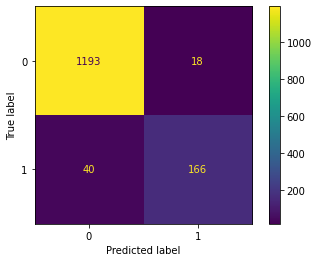

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1211
           1       0.90      0.81      0.85       206

    accuracy                           0.96      1417
   macro avg       0.93      0.90      0.91      1417
weighted avg       0.96      0.96      0.96      1417



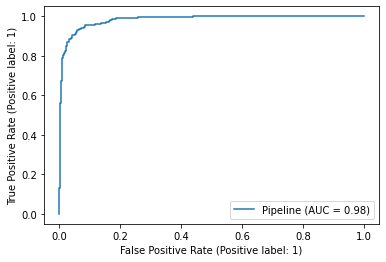

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(final_model, X_test, y_test);

## **Part 5: Conclusion**
After the model tuning, we discovered that Random Forest is the best model to predict customer’s churn, for which it reaches a balanced accuracy score of 93.5% for the test dataset. From now, we are able to use it to predict the churn of our customers. This model can not only be used in banking industries, but also subscription-based businesses, human resource management, retail market, etc. Knowing what factors influence customers’ decisions and which customers might get churned helps companies understand the drivers of customer behavior and allows them to provide better services, and thus to improve customer loyalty and retention.